# Taxi problem

In [31]:
import gym
import random
import matplotlib.pyplot as plt
import numpy as np

In [32]:
env = gym.make('Taxi-v3')

In [33]:
total_t = 0
total_r = 0

actions = env.action_space.n
states = env.observation_space.n

In [34]:
def update_q_table(q_table, new_state, old_state, action, reward, alpha):
    # Can not calcuate the new state, since we woudl have to use step(), which has side effects.
    old_q_value = q_table[(old_state, action)]
    best_future_reward = max(q_table[(new_state, action)] for action in range(actions))
    new_q_value_estimate = reward + best_future_reward
    
    q_table[(old_state, action)] = old_q_value + alpha * (new_q_value_estimate - old_q_value)

In [35]:
def greedy_action_policy(q_table, state):
    sub_state_space = {pair[0]:pair[1] for pair in q_table.items() if pair[0][0] == state}
    
    max_key = max(sub_state_space, key=lambda key: sub_state_space[key])
    max_item = (max_key, sub_state_space[max_key])
    
    best_items = [item for item in sub_state_space.items() if item[1] == max_item[1]]
    
    best_item = random.choice(best_items)
    
    best_action = best_item[0][1]
    return best_action

In [36]:
def train_agent(num_episodes, max_steps, alpha, epsilon):
    q_table = { (state, action): 0 for action in range(actions) for state in range(states) }

    metrics = {
        "rewards": [],
        "steps": [] 
    }

    for i_episode in range(num_episodes):
        observation = env.reset()
        done = False
        
        total_steps = 0
        total_reward = 0
        while not done and total_steps <= max_steps:
            total_steps += 1
            
            # animate_drive(0.01)
            
            action = None
            if epsilon and random.random() < epsilon:
                action = env.action_space.sample()
            else:
                action = greedy_action_policy(q_table, observation)

            old_state = observation
            observation, reward, done, info = env.step(action)
            update_q_table(q_table, observation, old_state, action, reward, alpha)

            total_reward += reward
            
            if done:
                metrics["rewards"].append(total_reward)
                metrics["steps"].append(total_steps)
                #print("Episode finished after {} timesteps".format(t))
                break
    
    return q_table, metrics

In [37]:
def average(lst): 
    return sum(lst) / len(lst)

In [38]:
from IPython.display import clear_output
import time
def animate_drive(wait_time = 0.5):
    clear_output(wait=True)
    env.render()
    time.sleep(wait_time)

In [39]:
def test(q_table, num_episodes):
    episode_rewards = []
    episode_steps = []
    
    for i_episode in range(num_episodes):
        observation = env.reset()
        done = False
        
        episode_steps.append(0)
        episode_rewards.append(0)
        while not done:
            #animate_drive()
            episode_steps[i_episode] += 1
            
            action = greedy_action_policy(q_table, observation)

            old_state = observation
            observation, reward, done, info = env.step(action)
            episode_rewards[i_episode] += reward

            if done:
                #print("steps", episode_steps[i_episode])
                break
    
    avg_reward = average(episode_rewards)
    avg_steps = average(episode_steps)
    
    print("avg reward", avg_reward)
    print("avg steps", avg_steps)    

In [44]:
train_episodes = 10000

max_steps = 99;
alpha = 0.7
epsilon = 0.1

seed = 0

env.seed(seed)
random.seed(seed)
env.action_space.seed(seed)

q_table, metrics = train_agent(train_episodes, max_steps, alpha, epsilon)

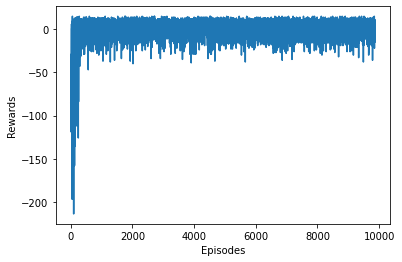

In [45]:
plt.plot(list(range(len(metrics["rewards"]))), metrics["rewards"])
plt.xlabel("Episodes")
plt.ylabel("Rewards")
plt.show()

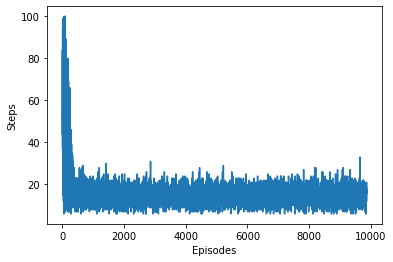

In [46]:
plt.plot(list(range(len(metrics["rewards"]))), metrics["steps"])
plt.xlabel("Episodes")
plt.ylabel("Steps")
plt.show()

In [47]:
test_episodes = 100

test(q_table, test_episodes)

env.close()

avg reward 8.08
avg steps 12.92
